Epoch 1/50


/Users/dineshbisht/masterdegree/myproject_env/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6305 - mae: 0.5198 - val_loss: 0.3300 - val_mae: 0.3730
Epoch 2/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - loss: 0.3982 - mae: 0.4203 - val_loss: 0.2917 - val_mae: 0.3532
Epoch 3/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - loss: 0.3641 - mae: 0.4069 - val_loss: 0.2774 - val_mae: 0.3529
Epoch 4/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - loss: 0.3534 - mae: 0.4014 - val_loss: 0.2619 - val_mae: 0.3382
Epoch 5/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - loss: 0.3454 - mae: 0.3824 - val_loss: 0.2558 - val_mae: 0.3293
Epoch 6/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - loss: 0.3438 - mae: 0.3855 - val_loss: 0.2540 - val_mae: 0.3336
Epoch 7/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - loss: 0.3230 - mae: 0.3758 - val_loss: 0.2457 - val_mae: 0.3272
Epoch 8/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - loss: 0.3229 - mae: 0.3717 - val_loss: 0.2517 - val_mae: 0.3352
Epoch 9/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step

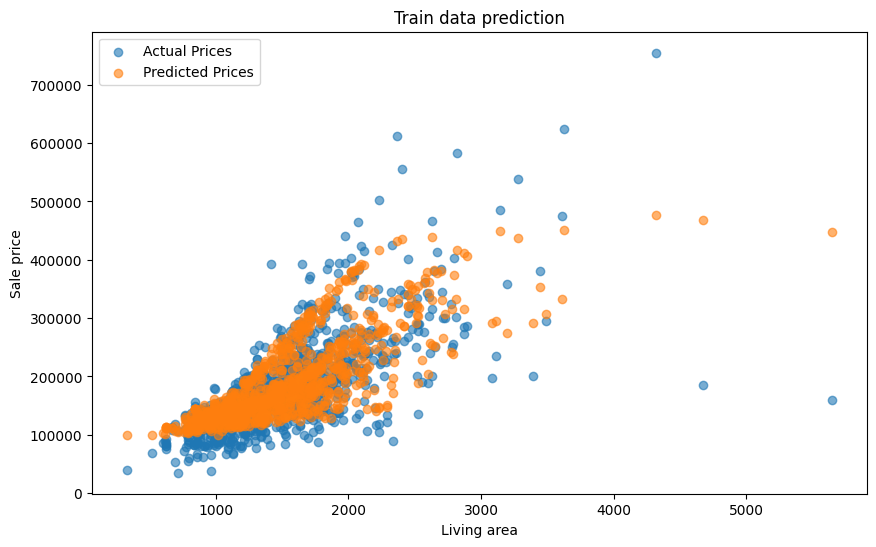

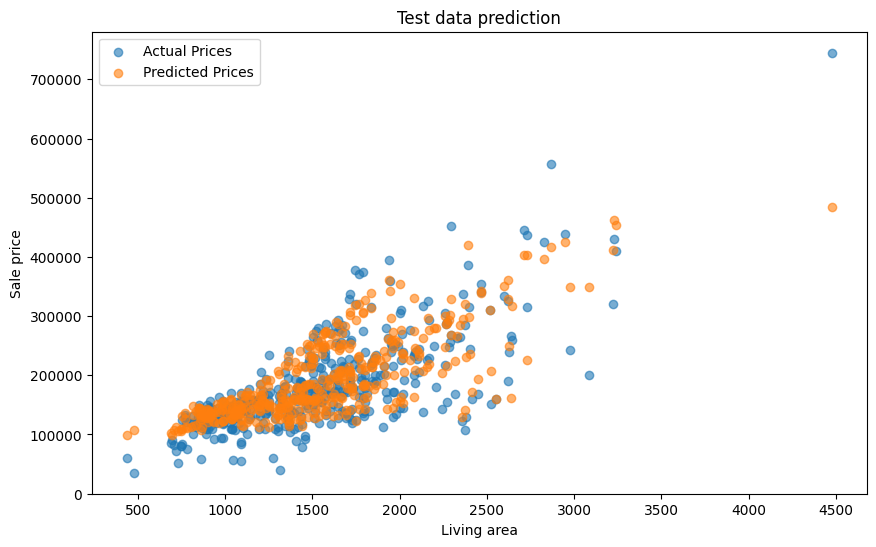

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Load CSV containing housing prices into Pandas DataFrame
df = pd.read_csv("HousePrice.csv")

# # Get basic information about data
# print(df[["GrLivArea", "LotArea", "YearBuilt", "HouseStyle" , "SalePrice"]].info())        # display information about relevant columns
# print(df[["GrLivArea", "LotArea", "YearBuilt", "HouseStyle" , "SalePrice"]].head())        # display first 5 rows
# print(df[["GrLivArea", "LotArea", "YearBuilt", "HouseStyle" , "SalePrice"]].isna().sum())  # Check missing values, handle them (drop or impute) if exists

# Group numeric and categorical features separately for preprocessing
numeric_cols     = ["GrLivArea", "LotArea", "YearBuilt"]
categorical_cols = ["HouseStyle"]

# Convert categorical feature (HouseStyle) to dummy variables (drop first to avoid multicollinearity)
dummies_categorical_df = pd.get_dummies(df[categorical_cols], dtype=int, drop_first=True)

# # Find distribution of each dummy columns
# print(dummies_categorical_df.apply(pd.value_counts))
# print(dummies_categorical_df.sum().sort_values(ascending=False))

# Remove low-frequency dummy variables to reduce noise
cols_to_drop = [col for col in dummies_categorical_df.columns
                if dummies_categorical_df[col].sum() < 20]
dummies_categorical_df.drop(columns=cols_to_drop, inplace=True)

# Scale numeric features using StandardScaler
scaler_x = StandardScaler()
scaled_numeric = scaler_x.fit_transform(df[numeric_cols]) # returns NumPy array

# Prepare features (X)
X_scaled = np.concatenate((scaled_numeric, dummies_categorical_df.to_numpy()), axis=1)

# Prepare target (y)
y = df["SalePrice"].values.reshape(-1, 1)  # reshape required for scaler

# Scale target using StandardScaler
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# Split data into train (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3)

# Train the model on the training dataset
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(30, activation='tanh',),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(30, activation='relu',),
    tf.keras.layers.Dense(1)
])

model.compile(
    tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

model.fit(X_train, y_train, validation_data=(X_test, y_test) , epochs=50, batch_size=10)

# Predict on train and test datasets
prediction_train = model.predict(X_train)
prediction_test = model.predict(X_test)

# Inverse-transform (restore original scale) of numeric feature columns
X_train[:, 0:3] = scaler_x.inverse_transform(X_train[:, 0:3])
X_test[:, 0:3] = scaler_x.inverse_transform(X_test[:, 0:3])

# Inverse-transform (restore original scale) of target
y_train = scaler_y.inverse_transform(y_train)
y_test = scaler_y.inverse_transform(y_test)

# Inverse-transform predictions
prediction_train = scaler_y.inverse_transform(prediction_train)
prediction_test = scaler_y.inverse_transform(prediction_test)

# Evaluate and display model accuracy with Mean Absolute Error for both train and test datasets
print(f"Mean absolute error in train dataset: {mean_absolute_error(y_train, prediction_train):.2f}")
print(f"Mean absolute error in test dataset: {mean_absolute_error(y_test, prediction_test):.2f}")

# Evaluate and display model accuracy with R2 Score for both train and test datasets
print(f"\nR2 score in train dataset: {r2_score(y_train, prediction_train):.2f}")
print(f"R2 score in test dataset: {r2_score(y_test, prediction_test):.2f}")


# Plot predictions vs actuals on train dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], y_train[:, 0], label="Actual Prices", alpha=0.6)
plt.scatter(X_train[:, 0], prediction_train[:, 0], label="Predicted Prices", alpha=0.6)
plt.title("Train data prediction")
plt.xlabel("Living area")
plt.ylabel("Sale price")
plt.legend(loc="upper left")
plt.show()

# Plot predictions vs actuals on test dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test[:, 0], label="Actual Prices", alpha=0.6)
plt.scatter(X_test[:, 0], prediction_test[:,0], label="Predicted Prices", alpha=0.6)
plt.title("Test data prediction")
plt.xlabel("Living area")
plt.ylabel("Sale price")
plt.legend(loc="upper left")
plt.show()